In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rioxarray as rxr
import earthpy as et

# Prettier plotting with seaborn
sns.set(font_scale = 1.5, style="whitegrid")

# Get data and set working directory
os.chdir('E:\Coding\Python\Earth Data Analytics')

In [2]:
# Define relative path to file
lidar_dem_path = os.path.join("data",
                              "colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")

# Open lidar dem
lidar_dem_xr = rxr.open_rasterio(lidar_dem_path, masked=True).squeeze()
lidar_dem_xr

<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
    band         int32 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [5]:
# Define relative path to file
lidar_dsm_path = os.path.join("data",
                              "colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DSM.tif")

# Open lidar dem
lidar_dsm_xr = rxr.open_rasterio(lidar_dsm_path, masked=True).squeeze()
lidar_dsm_xr

<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
    band         int32 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [6]:
# Are the bounds the same?
print("Is the spatial extent the same?",
      lidar_dem_xr.rio.bounds() == lidar_dsm_xr.rio.bounds())

# Is the resolution the same ??
print("Is the resolution the same?",
      lidar_dem_xr.rio.resolution() == lidar_dsm_xr.rio.resolution())

Is the spatial extent the same? True
Is the resolution the same? True


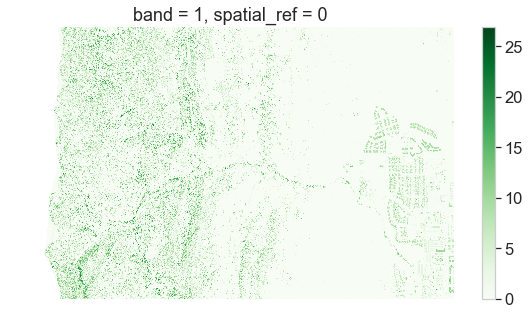

In [14]:
# Calculate canopy height model
lidar_chm_xr = lidar_dsm_xr - lidar_dem_xr

# Plot the data
f, ax = plt.subplots(figsize=(10, 5))
# lidar_chm_xr.plot(cmap="Greens")
ax.set(title="Canopy Height Model for Lee Hill Road Pre-Flood")
ax.set_axis_off()
lidar_chm_xr.plot.imshow(cmap="Greens", ax = ax)

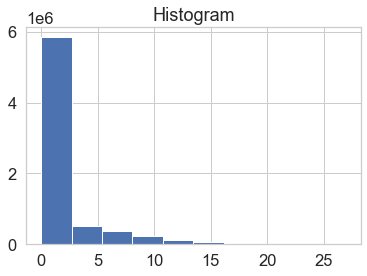

In [15]:
lidar_chm_xr.plot.hist()
plt.show()

In [16]:
print('CHM minimum value: ', np.nanmin(lidar_chm_xr))
print('CHM max value: ', np.nanmax(lidar_chm_xr))

CHM minimum value:  0.0
CHM max value:  26.930054


In [17]:
# Export a Raster to Geotiff
data_path = os.path.join("data",
                         "colorado-flood",
                         "spatial",
                         "outputs")

if os.path.exists(data_path):
    print("The directory", data_path, "exists!")
else:
    os.makedirs(data_path)

The directory data\colorado-flood\spatial\outputs exists!


In [18]:
# Make sure that your output data has a crs & no data value defined
print("The crs is", lidar_chm_xr.rio.crs)
print("The no data value is", lidar_chm_xr.rio.nodata)

The crs is PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32613"]]
The no data value is None


In [19]:
# Create the path to a new tif file.
pre_chm_data_path = os.path.join(data_path, "pre-flood-chm.tif")
pre_chm_data_path

'data\\colorado-flood\\spatial\\outputs\\pre-flood-chm.tif'

In [20]:
# Export the data to a geotiff format
lidar_chm_xr.rio.to_raster(pre_chm_data_path)

In [21]:
# Reopen the data
lidar_chm_data = rxr.open_rasterio(pre_chm_data_path, masked=True).squeeze()
lidar_chm_data

<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
    band         int32 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0